In [ ]:
# Data Source: https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_US_v1_00.tsv.gz

--2021-03-27 19:23:28--  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_US_v1_00.tsv.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.238.181
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.238.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1466965039 (1.4G) [application/x-gzip]
Saving to: ‘amazon_reviews_multilingual_US_v1_00.tsv.gz’

amazon_reviews_mult 100%[===================>]   1.37G  97.5MB/s    in 15s     

2021-03-27 19:23:43 (95.8 MB/s) - ‘amazon_reviews_multilingual_US_v1_00.tsv.gz’ saved [1466965039/1466965039]



In [13]:
# Importing packages and libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# Import the dataset from URL
# Using \t since this is a tsv data and to exclude rows that may have too many fields returned as columns

url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_US_v1_00.tsv.gz"
data = pd.read_csv(url, sep='\t', error_bad_lines=False)  

b'Skipping line 3231472: expected 15 fields, saw 22\n'
b'Skipping line 3509762: expected 15 fields, saw 22\n'
b'Skipping line 4018793: expected 15 fields, saw 22\n'
b'Skipping line 4280173: expected 15 fields, saw 22\nSkipping line 4290596: expected 15 fields, saw 22\n'
b'Skipping line 4331421: expected 15 fields, saw 22\nSkipping line 4340267: expected 15 fields, saw 22\nSkipping line 4341665: expected 15 fields, saw 22\nSkipping line 4386155: expected 15 fields, saw 22\nSkipping line 4388098: expected 15 fields, saw 22\n'
b'Skipping line 4408027: expected 15 fields, saw 22\nSkipping line 4442615: expected 15 fields, saw 22\n'
b'Skipping line 4519623: expected 15 fields, saw 22\n'
b'Skipping line 4525797: expected 15 fields, saw 22\nSkipping line 4543519: expected 15 fields, saw 22\n'
b'Skipping line 4587726: expected 15 fields, saw 22\nSkipping line 4589301: expected 15 fields, saw 22\nSkipping line 4634393: expected 15 fields, saw 22\n'
b'Skipping line 4666168: expected 15 fields, s

In [6]:
# Check the top and bottom few rows of data to understand the table and format

data

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,0.0,1.0,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4.0,0.0,0.0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17
2,US,53096332,R1LLAY5W5PZUS4,0671701800,860650224,Contact,Books,5.0,1.0,2.0,N,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
3,US,53096335,R3R9VTJ82FXECQ,0425132153,624269601,Good Omens,Books,5.0,0.0,0.0,N,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11
4,US,51747709,R1P5J3FNBWTFXY,0517122707,161411385,A Confederacy of Dunces,Books,5.0,0.0,0.0,N,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900881,US,52303,R16DAHIWNXFOYI,B00QW8TYWO,828652896,Crossy Road,Mobile_Apps,5.0,0.0,0.0,N,Y,Five Stars,very fun game,2015-08-31
6900882,US,565563,R1DS6EBGAEJDB5,B00PSLQYWE,156264553,Downton Abbey Season 5,Digital_Video_Download,5.0,0.0,0.0,N,Y,Five Stars,Great,2015-08-31
6900883,US,254421,R3HEHT8JUA33VW,B000FC1LOC,354573823,My Sister's Keeper: A Novel (Wsp Readers Club),Digital_Ebook_Purchase,5.0,0.0,0.0,N,N,and she has beautifully written and explored t...,"This is my first book from Jodi, and she has b...",2015-08-31
6900884,US,146004,RVK4I33L93536,B008T4HHWS,599809487,Scent of a Woman,Digital_Video_Download,5.0,0.0,0.0,N,N,Like this!,Good movie!,2015-08-31


In [8]:
# Check which columns have how many missing data

data.isnull().sum()  

# data.dtypes               # To just check the column data types

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          0
product_category       0
star_rating            1
helpful_votes          1
total_votes            1
vine                   1
verified_purchase      1
review_headline       75
review_body           76
review_date          324
dtype: int64

In [9]:
# Dropping columns with missing values since these are too many rows with missing values

data = data.dropna()
data.shape                 # To check the number of rows and columns, i.e shape

(6900413, 15)

In [10]:
# Summary of all numerical values (although not that helpful in this case)

data.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,6.900413e+06,6.900413e+06,6.900413e+06,6.900413e+06,6.900413e+06
mean,2.918798e+07,4.933006e+08,4.306593e+00,2.044426e+00,3.251535e+00
std,1.565194e+07,2.861564e+08,1.146194e+00,3.184590e+01,3.634082e+01
min,1.000100e+04,2.254720e+05,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.501686e+07,2.495109e+08,4.000000e+00,0.000000e+00,0.000000e+00
50%,2.881078e+07,4.965205e+08,5.000000e+00,0.000000e+00,0.000000e+00
75%,4.414300e+07,7.448221e+08,5.000000e+00,1.000000e+00,2.000000e+00
max,5.309659e+07,9.999881e+08,5.000000e+00,2.755000e+04,2.872700e+04


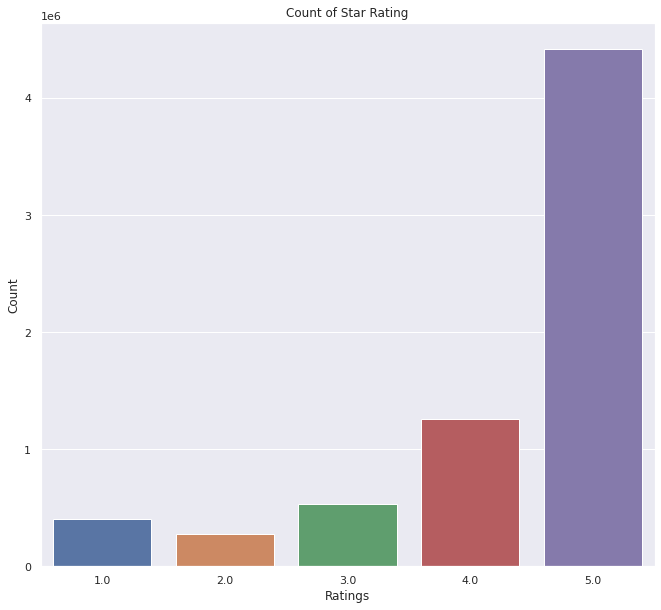

In [71]:
# Visualizing the count of Star ratings

plot1 = sns.countplot(x = 'star_rating', data = data)
plot1.set_xlabel("Ratings")
plot1.set_ylabel("Count")
plot1.set_title('Count of Star Rating')
plt.show()

# Majoity of the ratings are over 4 and 5. 

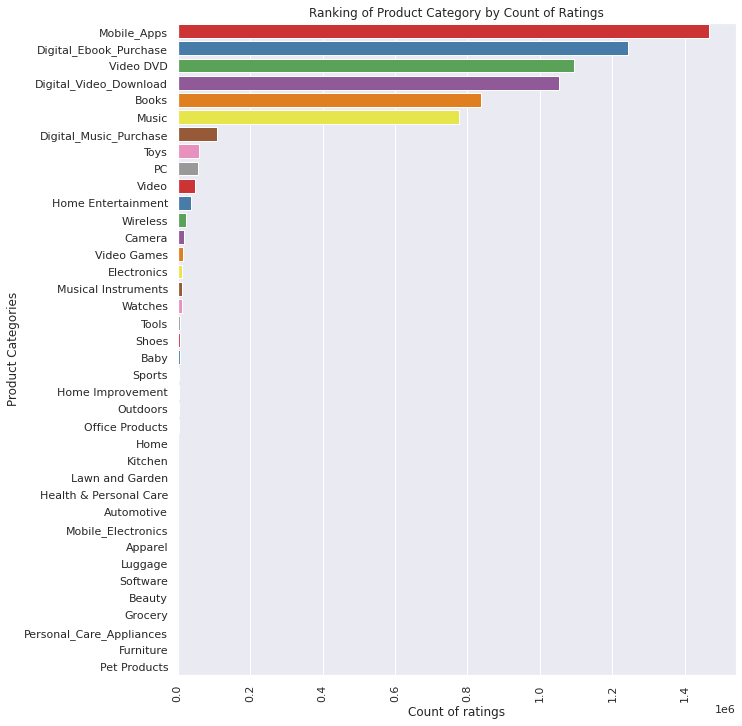

In [72]:
# Ranking the count of product category reviews

plt.figure(figsize=(10,12))
plot2 = sns.countplot(y = 'product_category', order= data['product_category'].value_counts().index, data = data, orient = 'h', palette="Set1")
plot2.set_xlabel("Count of ratings")
plot2.set_ylabel("Product Categories")
plot2.set_title('Ranking of Product Category by Count of Ratings')
plt.xticks(rotation=90)
plt.show()

# Mobile Apps account to the highest number of reviews, followed by ebooks, video/dvd, video download and books.

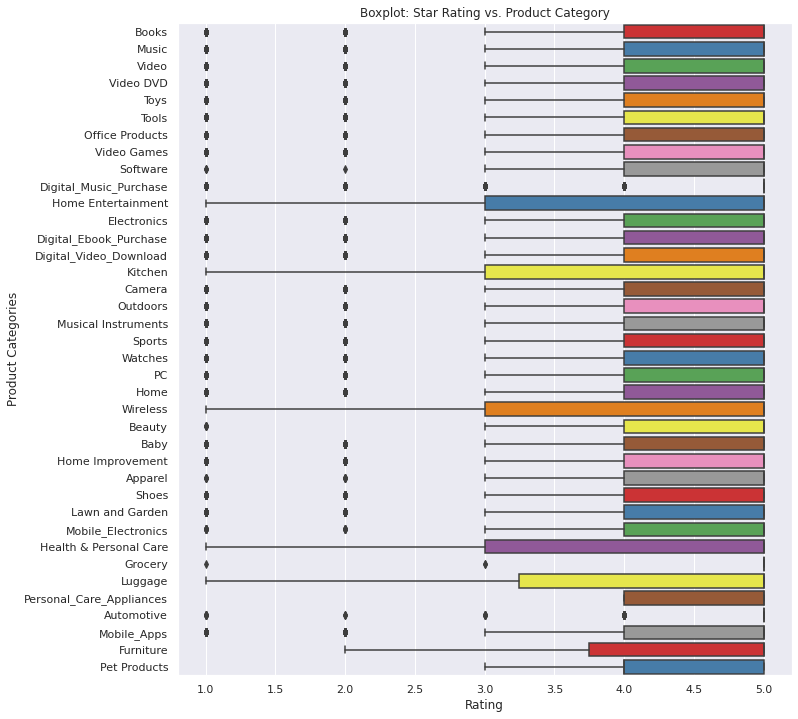

In [73]:
# Creating a box plot to understand how the ratings are distributed with various product categories

plt.figure(figsize=(11,12))
plot3 = sns.boxplot(y="product_category", x="star_rating", data=data, palette="Set1")
plot3.set_xlabel("Rating")
plot3.set_ylabel("Product Categories")
plot3.set_title('Boxplot: Star Rating vs. Product Category')
plt.show()


In [46]:
# To make better use of date reviewed column, converting it to datetime format and then spliting it per year, month and day

data.iloc[:,14] = data.iloc[:, 14].apply(pd.to_datetime)
data['month'] = data['date_reviewed'].dt.month
data['year'] = data['date_reviewed'].dt.year
data['day'] = data['date_reviewed'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

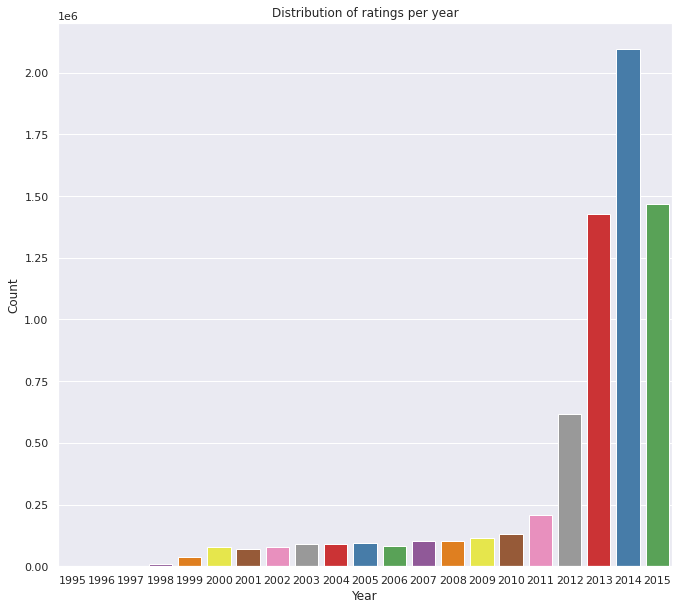

In [74]:
# Visualizing the number of reviews per year

plot4 = sns.countplot(x = 'year', data = data, palette="Set1")
plot4.set_xlabel("Year")
plot4.set_ylabel("Count")
plot4.set_title('Distribution of ratings per year')
plt.show()

In [56]:
# Checking for the decline in number of reviews for 2015

data['review_date'][data['review_date'] > '2015-01-01']

5441389   2015-01-02
5441390   2015-01-02
5441391   2015-01-02
5441392   2015-01-02
5441393   2015-01-02
             ...    
6900881   2015-08-31
6900882   2015-08-31
6900883   2015-08-31
6900884   2015-08-31
6900885   2015-08-31
Name: review_date, Length: 1459351, dtype: datetime64[ns]

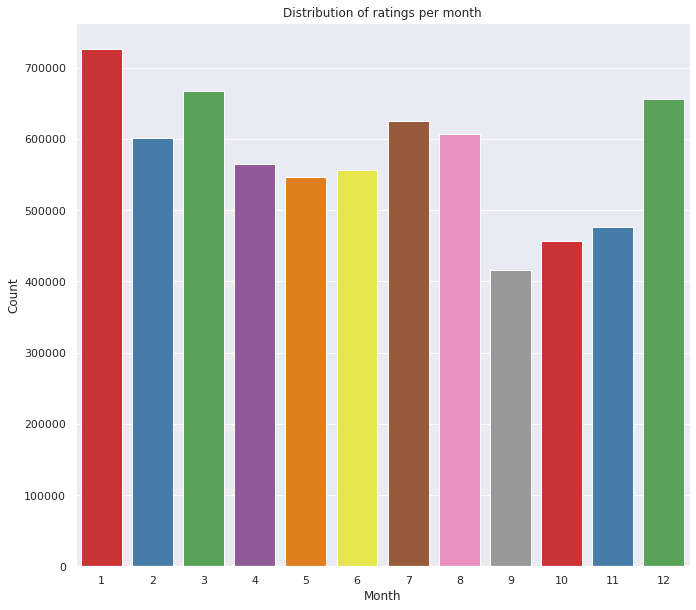

In [75]:
# Visualizing the number of reviews per month
# 1 = January, 12 = December

plot5 = sns.countplot(x = 'month', data = data, palette="Set1")
plot5.set_xlabel("Month")
plot5.set_ylabel("Count")
plot5.set_title('Distribution of ratings per month')
plt.show()

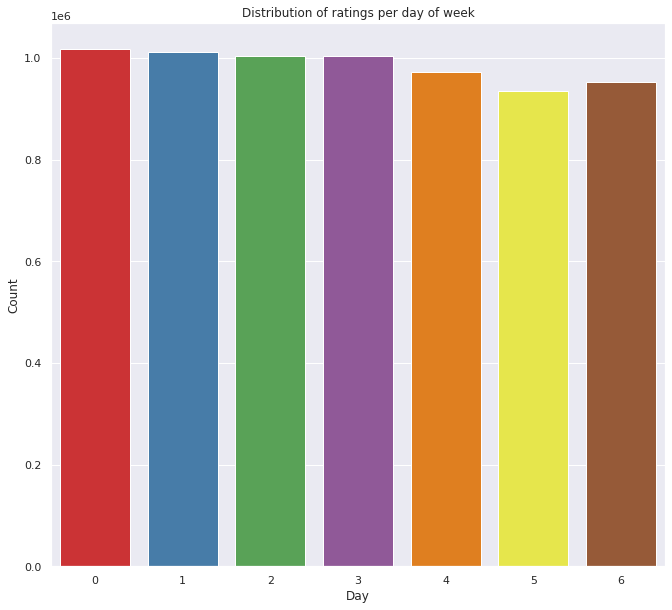

In [76]:
# Visualizing the number of reviews per day
# 0 = Monday, 6 = Sunday

plot6 = sns.countplot(x = 'day', data = data, palette="Set1")
plot6.set_xlabel("Day")
plot6.set_ylabel("Count")
plot6.set_title('Distribution of ratings per day of week')
plt.show()